## Diabetes  Diagnosis Project - Salar Shafiee- THD - CODE 15

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes. this data has been extracted from Kaggle.com

this project is done as a part of Tehran data science course - code 15 - Salar Shafiee


### Content

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

- Pregnancies: Number of times pregnant 
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
- BloodPressure: Diastolic blood pressure (mm Hg) 
- SkinThickness: Triceps skin fold thickness (mm) 
- Insulin: 2-Hour serum insulin (mu U/ml) 
- BMI: Body mass index (weight in kg/(height in m)^2) 
- DiabetesPedigreeFunction: Diabetes pedigree function 
- Age: Age (years) 
- Outcome: Class variable (0 or 1)


#### Relevant Information:
      Several constraints were placed on the selection of these instances from
      a larger database.  In particular, all patients here are females at
      least 21 years old of Pima Indian heritage.  ADAP is an adaptive learning
      routine that generates and executes digital analogs of perceptron-like
      devices.  It is a unique algorithm; see the paper for details.

#### Number of Instances: 768

#### Number of Attributes: 8 plus class 

#### For Each Attribute: (all numeric-valued)
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)

#### Missing Attribute Values: Yes

#### Class Distribution: (class value 1 is interpreted as "tested positive for
   diabetes")


## 1. Installing

In [14]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

%config InlineBackend.figure_format = 'retina'

# to display all columns and rows:
pd.set_option('display.max_columns', None); pd.set_option('display.max_rows', None);  # to display all columns and rows
pd.set_option('display.float_format', lambda x: '%.2f' % x) # The number of numbers that will be shown after the comma.


## 2. EDA (Exploratory of Data Analysis)
### 2.1. Data Preperation

In [4]:
#Reading the dataset
df = pd.read_csv('C:/Users/salir/OneDrive/Desktop/diabetes.csv')

In [5]:
df.shape

(768, 9)

In [6]:
df.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.00,3.85,3.37,0.00,0.00,1.00,3.00,6.00,9.00,10.00,13.00,17.00
Glucose,768.00,120.89,31.97,0.00,85.00,99.00,117.00,140.25,167.00,181.00,196.00,199.00
BloodPressure,768.00,69.11,19.36,0.00,54.00,62.00,72.00,80.00,88.00,90.00,106.00,122.00
SkinThickness,768.00,20.54,15.95,0.00,0.00,0.00,23.00,32.00,40.00,44.00,51.33,99.00
Insulin,768.00,79.80,115.24,0.00,0.00,0.00,30.50,127.25,210.00,293.00,519.90,846.00
BMI,768.00,31.99,7.88,0.00,23.60,27.30,32.00,36.60,41.50,44.39,50.76,67.10
DiabetesPedigreeFunction,768.00,0.47,0.33,0.08,0.17,0.24,0.37,0.63,0.88,1.13,1.70,2.42
Age,768.00,33.24,11.76,21.00,22.00,24.00,29.00,41.00,51.00,58.00,67.00,81.00
Outcome,768.00,0.35,0.48,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00


In [7]:
df["Outcome"].value_counts()*100/len(df)

Outcome
0   65.10
1   34.90
Name: count, dtype: float64

In [8]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

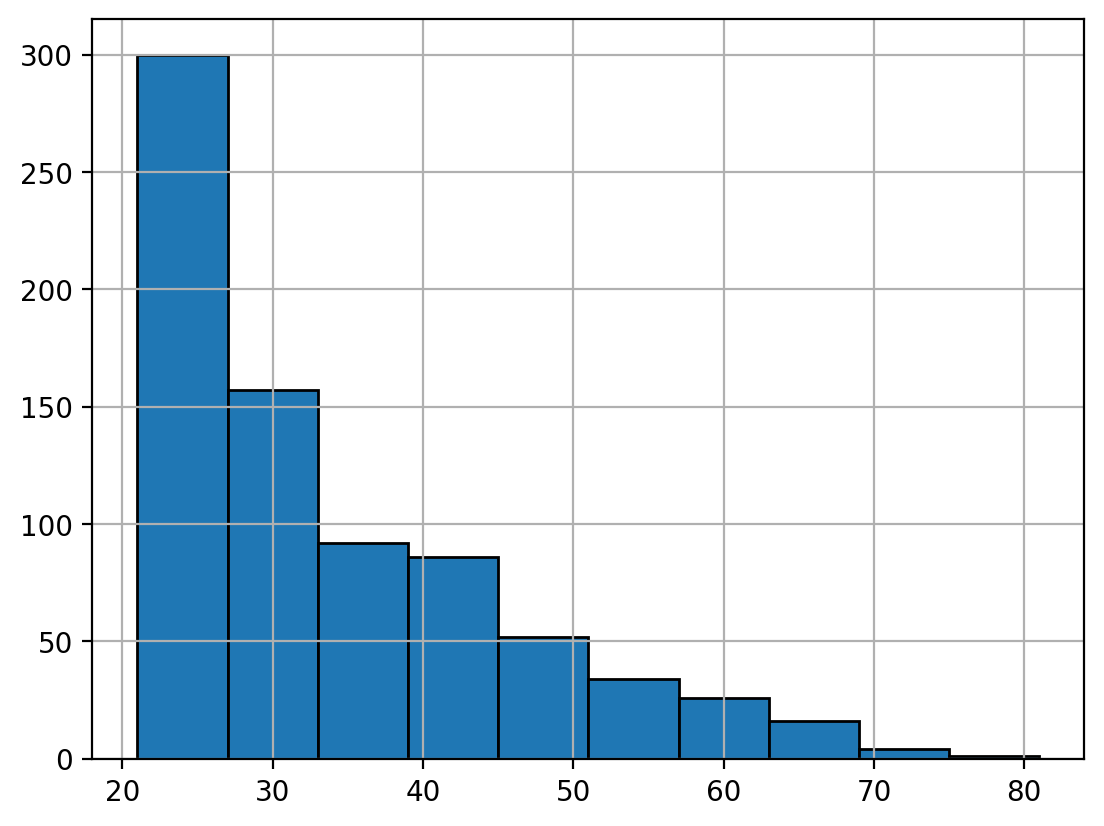

In [9]:
df["Age"].hist(edgecolor = "black");

## 3. Missing Value Analysis

In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.NaN)

In [12]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

  Obtaining dependency information for missingno from https://files.pythonhosted.org/packages/87/22/cd5cf999af21c2f97486622c551ac3d07361ced8125121e907f588ff5f24/missingno-0.5.2-py3-none-any.whl.metadata


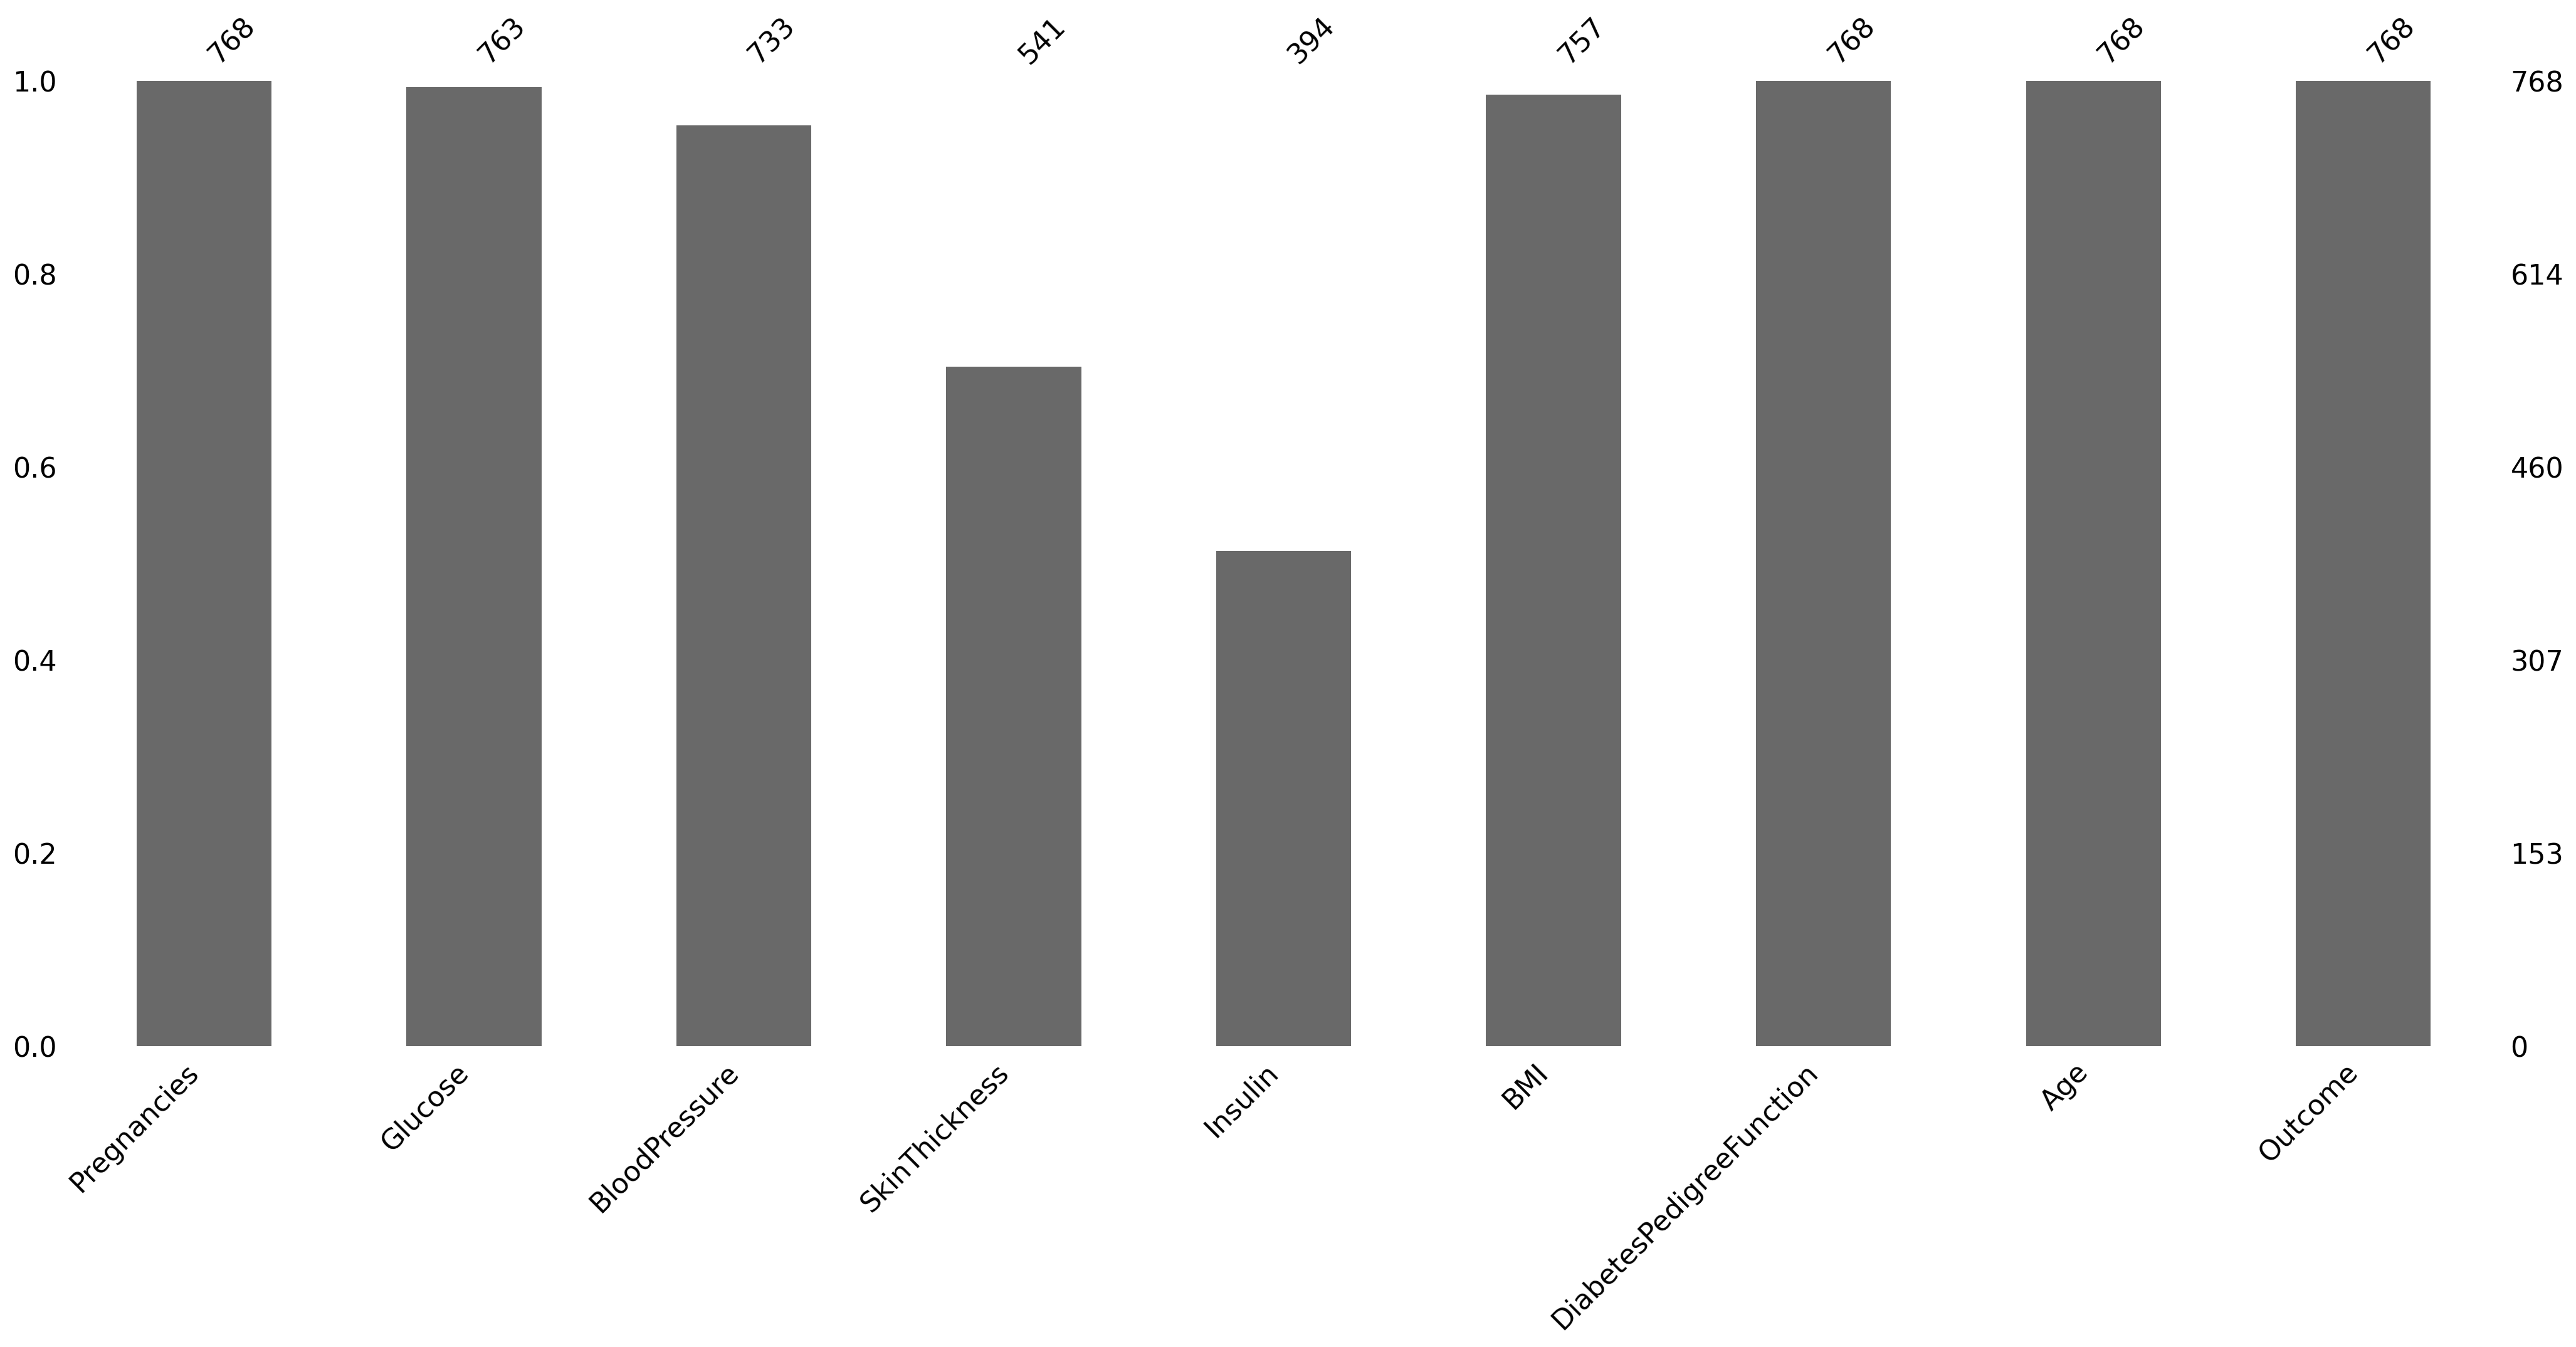

In [15]:
!pip install  missingno


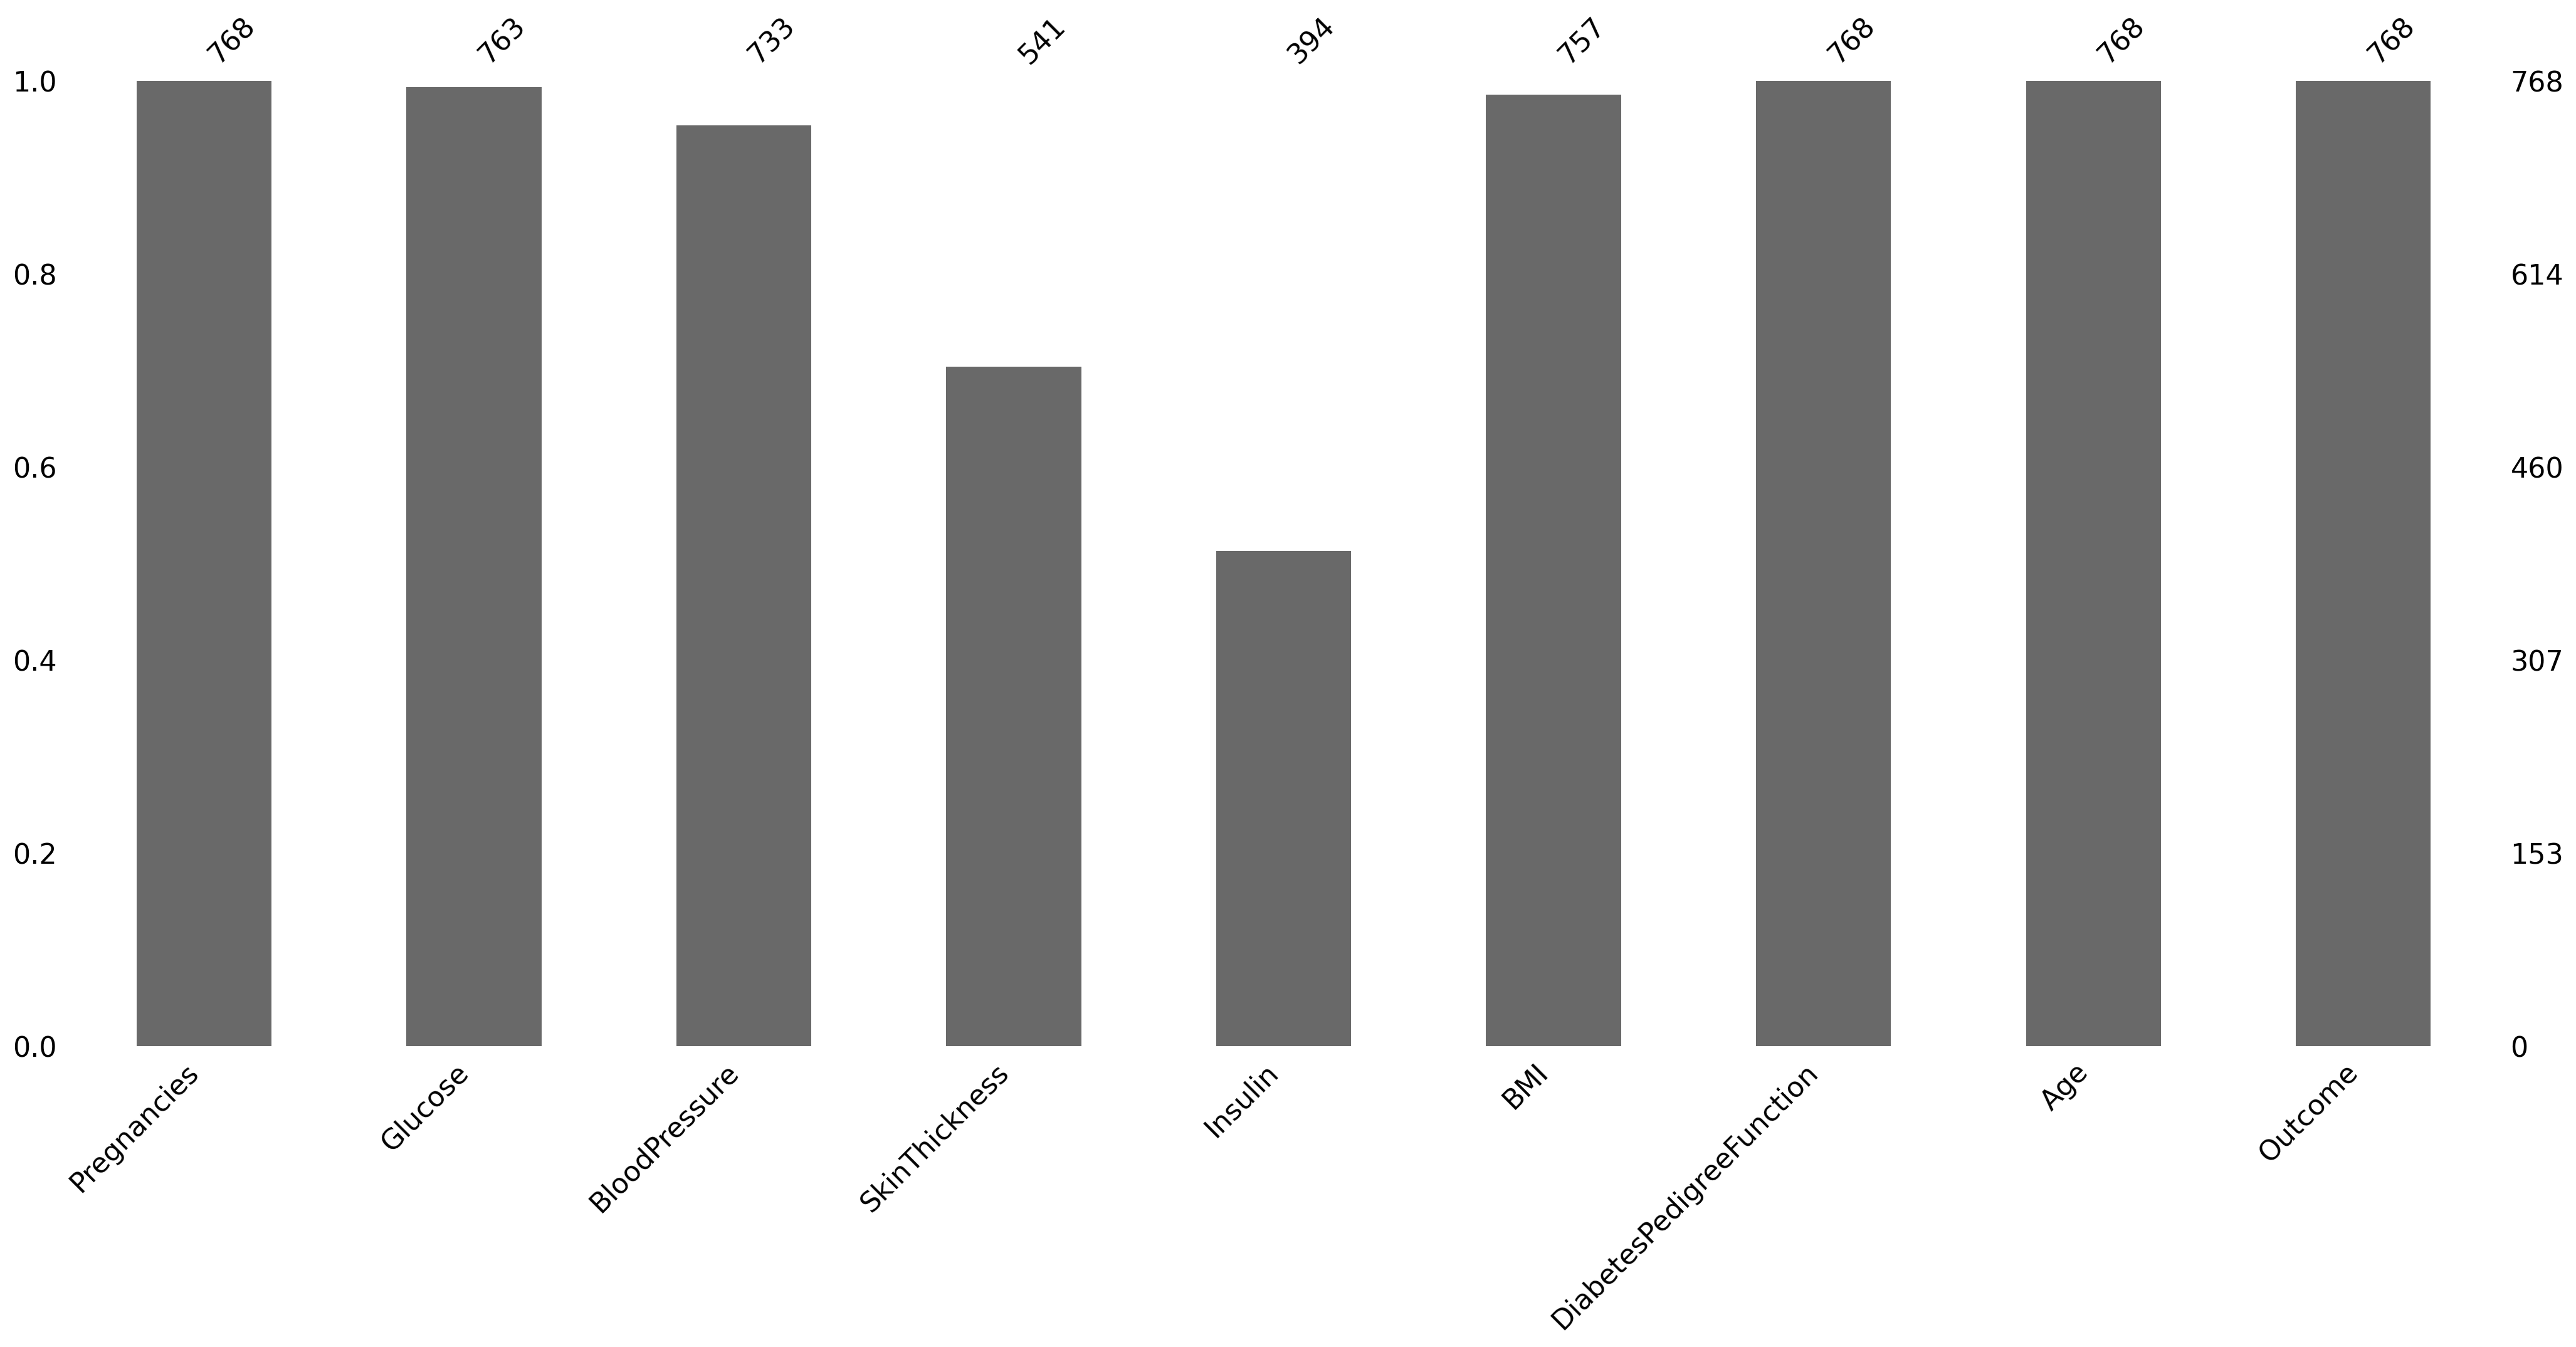

In [16]:
import missingno as msno
msno.bar(df);

In [17]:
def carp(x,y):
    
    z = x*y
    
    return z


In [18]:
carp(4,5)

20

In [19]:
# The missing values will be filled with the median values of each variable.

def median_target(var):   
    
    temp = df[df[var].notnull()]
    
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    
    return temp

In [20]:
columns = df.columns

columns = columns.drop("Outcome")

In [21]:
columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [22]:
median_target('Glucose')

,Outcome,Glucose
0,0,107.00
1,1,140.00


In [23]:
# The values to be given for incomplete observations are given the median value of people who are not sick and the median values of people who are sick.

columns = df.columns

columns = columns.drop("Outcome")

for col in columns:
    
    df.loc[(df['Outcome'] == 0 ) & (df[col].isnull()), col] = median_target(col)[col][0]
    df.loc[(df['Outcome'] == 1 ) & (df[col].isnull()), col] = median_target(col)[col][1]

In [24]:
df.loc[(df['Outcome'] == 0 ) & (df["Pregnancies"].isnull()), "Pregnancies"]

Series([], Name: Pregnancies, dtype: int64)

In [25]:
df[(df['Outcome'] == 0 ) & (df["BloodPressure"].isnull())]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


## 4. Outliers Analysis

In [26]:
Q1 = df["BloodPressure"].quantile(0.25)
Q3 = df["BloodPressure"].quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

In [27]:
lower

40.0

In [28]:
upper

104.0

In [29]:
df[(df["BloodPressure"] > upper)].any(axis=None)

True

In [30]:
for feature in df:
    print(feature)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


In [31]:
for feature in df:
    
    Q1 = df[feature].quantile(0.05)
    Q3 = df[feature].quantile(0.95)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    if df[(df[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

Pregnancies no
Glucose no
BloodPressure no
SkinThickness yes
Insulin yes
BMI no
DiabetesPedigreeFunction no
Age no
Outcome no


In [32]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.00,72.00,35.00,169.50,33.60,0.63,50,1
1,1,85.00,66.00,29.00,102.50,26.60,0.35,31,0
2,8,183.00,64.00,32.00,169.50,23.30,0.67,32,1
3,1,89.00,66.00,23.00,94.00,28.10,0.17,21,0
4,0,137.00,40.00,35.00,168.00,43.10,2.29,33,1


In [33]:
df.shape

(768, 9)

## 5. Feature Engineering

In [34]:
# According to BMI, some ranges were determined and categorical variables were assigned.
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")

df["NewBMI"] = NewBMI

df.loc[df["BMI"] < 18.5, "NewBMI"] = NewBMI[0]

df.loc[(df["BMI"] > 18.5) & (df["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
df.loc[(df["BMI"] > 24.9) & (df["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
df.loc[(df["BMI"] > 29.9) & (df["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
df.loc[(df["BMI"] > 34.9) & (df["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
df.loc[df["BMI"] > 39.9 ,"NewBMI"] = NewBMI[5]

In [35]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6,148.00,72.00,35.00,169.50,33.60,0.63,50,1,Obesity 1
1,1,85.00,66.00,29.00,102.50,26.60,0.35,31,0,Overweight
2,8,183.00,64.00,32.00,169.50,23.30,0.67,32,1,Normal
3,1,89.00,66.00,23.00,94.00,28.10,0.17,21,0,Overweight
4,0,137.00,40.00,35.00,168.00,43.10,2.29,33,1,Obesity 3


In [36]:
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"     

In [37]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6,148.00,72.00,35.00,169.50,33.60,0.63,50,1,Obesity 1
1,1,85.00,66.00,29.00,102.50,26.60,0.35,31,0,Overweight
2,8,183.00,64.00,32.00,169.50,23.30,0.67,32,1,Normal
3,1,89.00,66.00,23.00,94.00,28.10,0.17,21,0,Overweight
4,0,137.00,40.00,35.00,168.00,43.10,2.29,33,1,Obesity 3


In [38]:
df["NewInsulinScore"] = df.apply(set_insulin, axis=1)

In [39]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore
0,6,148.00,72.00,35.00,169.50,33.60,0.63,50,1,Obesity 1,Abnormal
1,1,85.00,66.00,29.00,102.50,26.60,0.35,31,0,Overweight,Normal
2,8,183.00,64.00,32.00,169.50,23.30,0.67,32,1,Normal,Abnormal
3,1,89.00,66.00,23.00,94.00,28.10,0.17,21,0,Overweight,Normal
4,0,137.00,40.00,35.00,168.00,43.10,2.29,33,1,Obesity 3,Abnormal


In [40]:
#df.drop("NewInsulinScore", inplace = True, axis = 1)
#df.head()

In [41]:
# Some intervals were determined according to the glucose variable and these were assigned categorical variables.
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")

df["NewGlucose"] = NewGlucose

df.loc[df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]

df.loc[(df["Glucose"] > 70) & (df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]

df.loc[(df["Glucose"] > 99) & (df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]

df.loc[df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [42]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6,148.00,72.00,35.00,169.50,33.60,0.63,50,1,Obesity 1,Abnormal,Secret
1,1,85.00,66.00,29.00,102.50,26.60,0.35,31,0,Overweight,Normal,Normal
2,8,183.00,64.00,32.00,169.50,23.30,0.67,32,1,Normal,Abnormal,Secret
3,1,89.00,66.00,23.00,94.00,28.10,0.17,21,0,Overweight,Normal,Normal
4,0,137.00,40.00,35.00,168.00,43.10,2.29,33,1,Obesity 3,Abnormal,Secret


## 6. One-hot Encoding

In [43]:
df = pd.get_dummies(df, columns =["NewBMI","NewInsulinScore", "NewGlucose"], drop_first = True)

In [44]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,6,148.00,72.00,35.00,169.50,33.60,0.63,50,1,True,False,False,False,False,False,False,False,False,True
1,1,85.00,66.00,29.00,102.50,26.60,0.35,31,0,False,False,False,True,False,True,False,True,False,False
2,8,183.00,64.00,32.00,169.50,23.30,0.67,32,1,False,False,False,False,False,False,False,False,False,True
3,1,89.00,66.00,23.00,94.00,28.10,0.17,21,0,False,False,False,True,False,True,False,True,False,False
4,0,137.00,40.00,35.00,168.00,43.10,2.29,33,1,False,False,True,False,False,False,False,False,False,True


In [45]:
categorical_df = df[['NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret']]

## 7. Feature Standartization

In [46]:
y = df["Outcome"]
X = df.drop(["Outcome",'NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'], axis = 1)
cols = X.columns
index = X.index

In [47]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [48]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.00,72.00,35.00,169.50,33.60,0.63,50
1,1,85.00,66.00,29.00,102.50,26.60,0.35,31
2,8,183.00,64.00,32.00,169.50,23.30,0.67,32
3,1,89.00,66.00,23.00,94.00,28.10,0.17,21
4,0,137.00,40.00,35.00,168.00,43.10,2.29,33


In [49]:
cols

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [50]:
index

RangeIndex(start=0, stop=768, step=1)

In [51]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns = cols, index = index)

In [52]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.60,0.77,0.00,1.00,1.00,0.17,0.67,1.24
1,-0.40,-0.79,-0.38,0.14,0.00,-0.60,-0.06,0.12
2,1.00,1.63,-0.50,0.57,1.00,-0.96,0.78,0.18
3,-0.40,-0.69,-0.38,-0.71,-0.13,-0.43,-0.54,-0.47
4,-0.60,0.49,-2.00,1.00,0.98,1.21,5.01,0.24


In [53]:
X = pd.concat([X, categorical_df], axis = 1)

In [54]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,0.60,0.77,0.00,1.00,1.00,0.17,0.67,1.24,True,False,False,False,False,False,False,False,False,True
1,-0.40,-0.79,-0.38,0.14,0.00,-0.60,-0.06,0.12,False,False,False,True,False,True,False,True,False,False
2,1.00,1.63,-0.50,0.57,1.00,-0.96,0.78,0.18,False,False,False,False,False,False,False,False,False,True
3,-0.40,-0.69,-0.38,-0.71,-0.13,-0.43,-0.54,-0.47,False,False,False,True,False,True,False,True,False,False
4,-0.60,0.49,-2.00,1.00,0.98,1.21,5.01,0.24,False,False,True,False,False,False,False,False,False,True


## 8. Model

LR: 0.847539 (0.032028)
KNN: nan (nan)
CART: 0.838602 (0.026456)
RF: 0.878947 (0.030074)
SVM: 0.848855 (0.035492)
XGB: 0.880297 (0.029243)
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 241, number of negative: 450
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000093 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 726
[LightGBM] [Info] Number of data points in the train set: 691, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348770 -> initscore=-0.624451
[LightGBM] [Info] Start training from score -0.624451
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

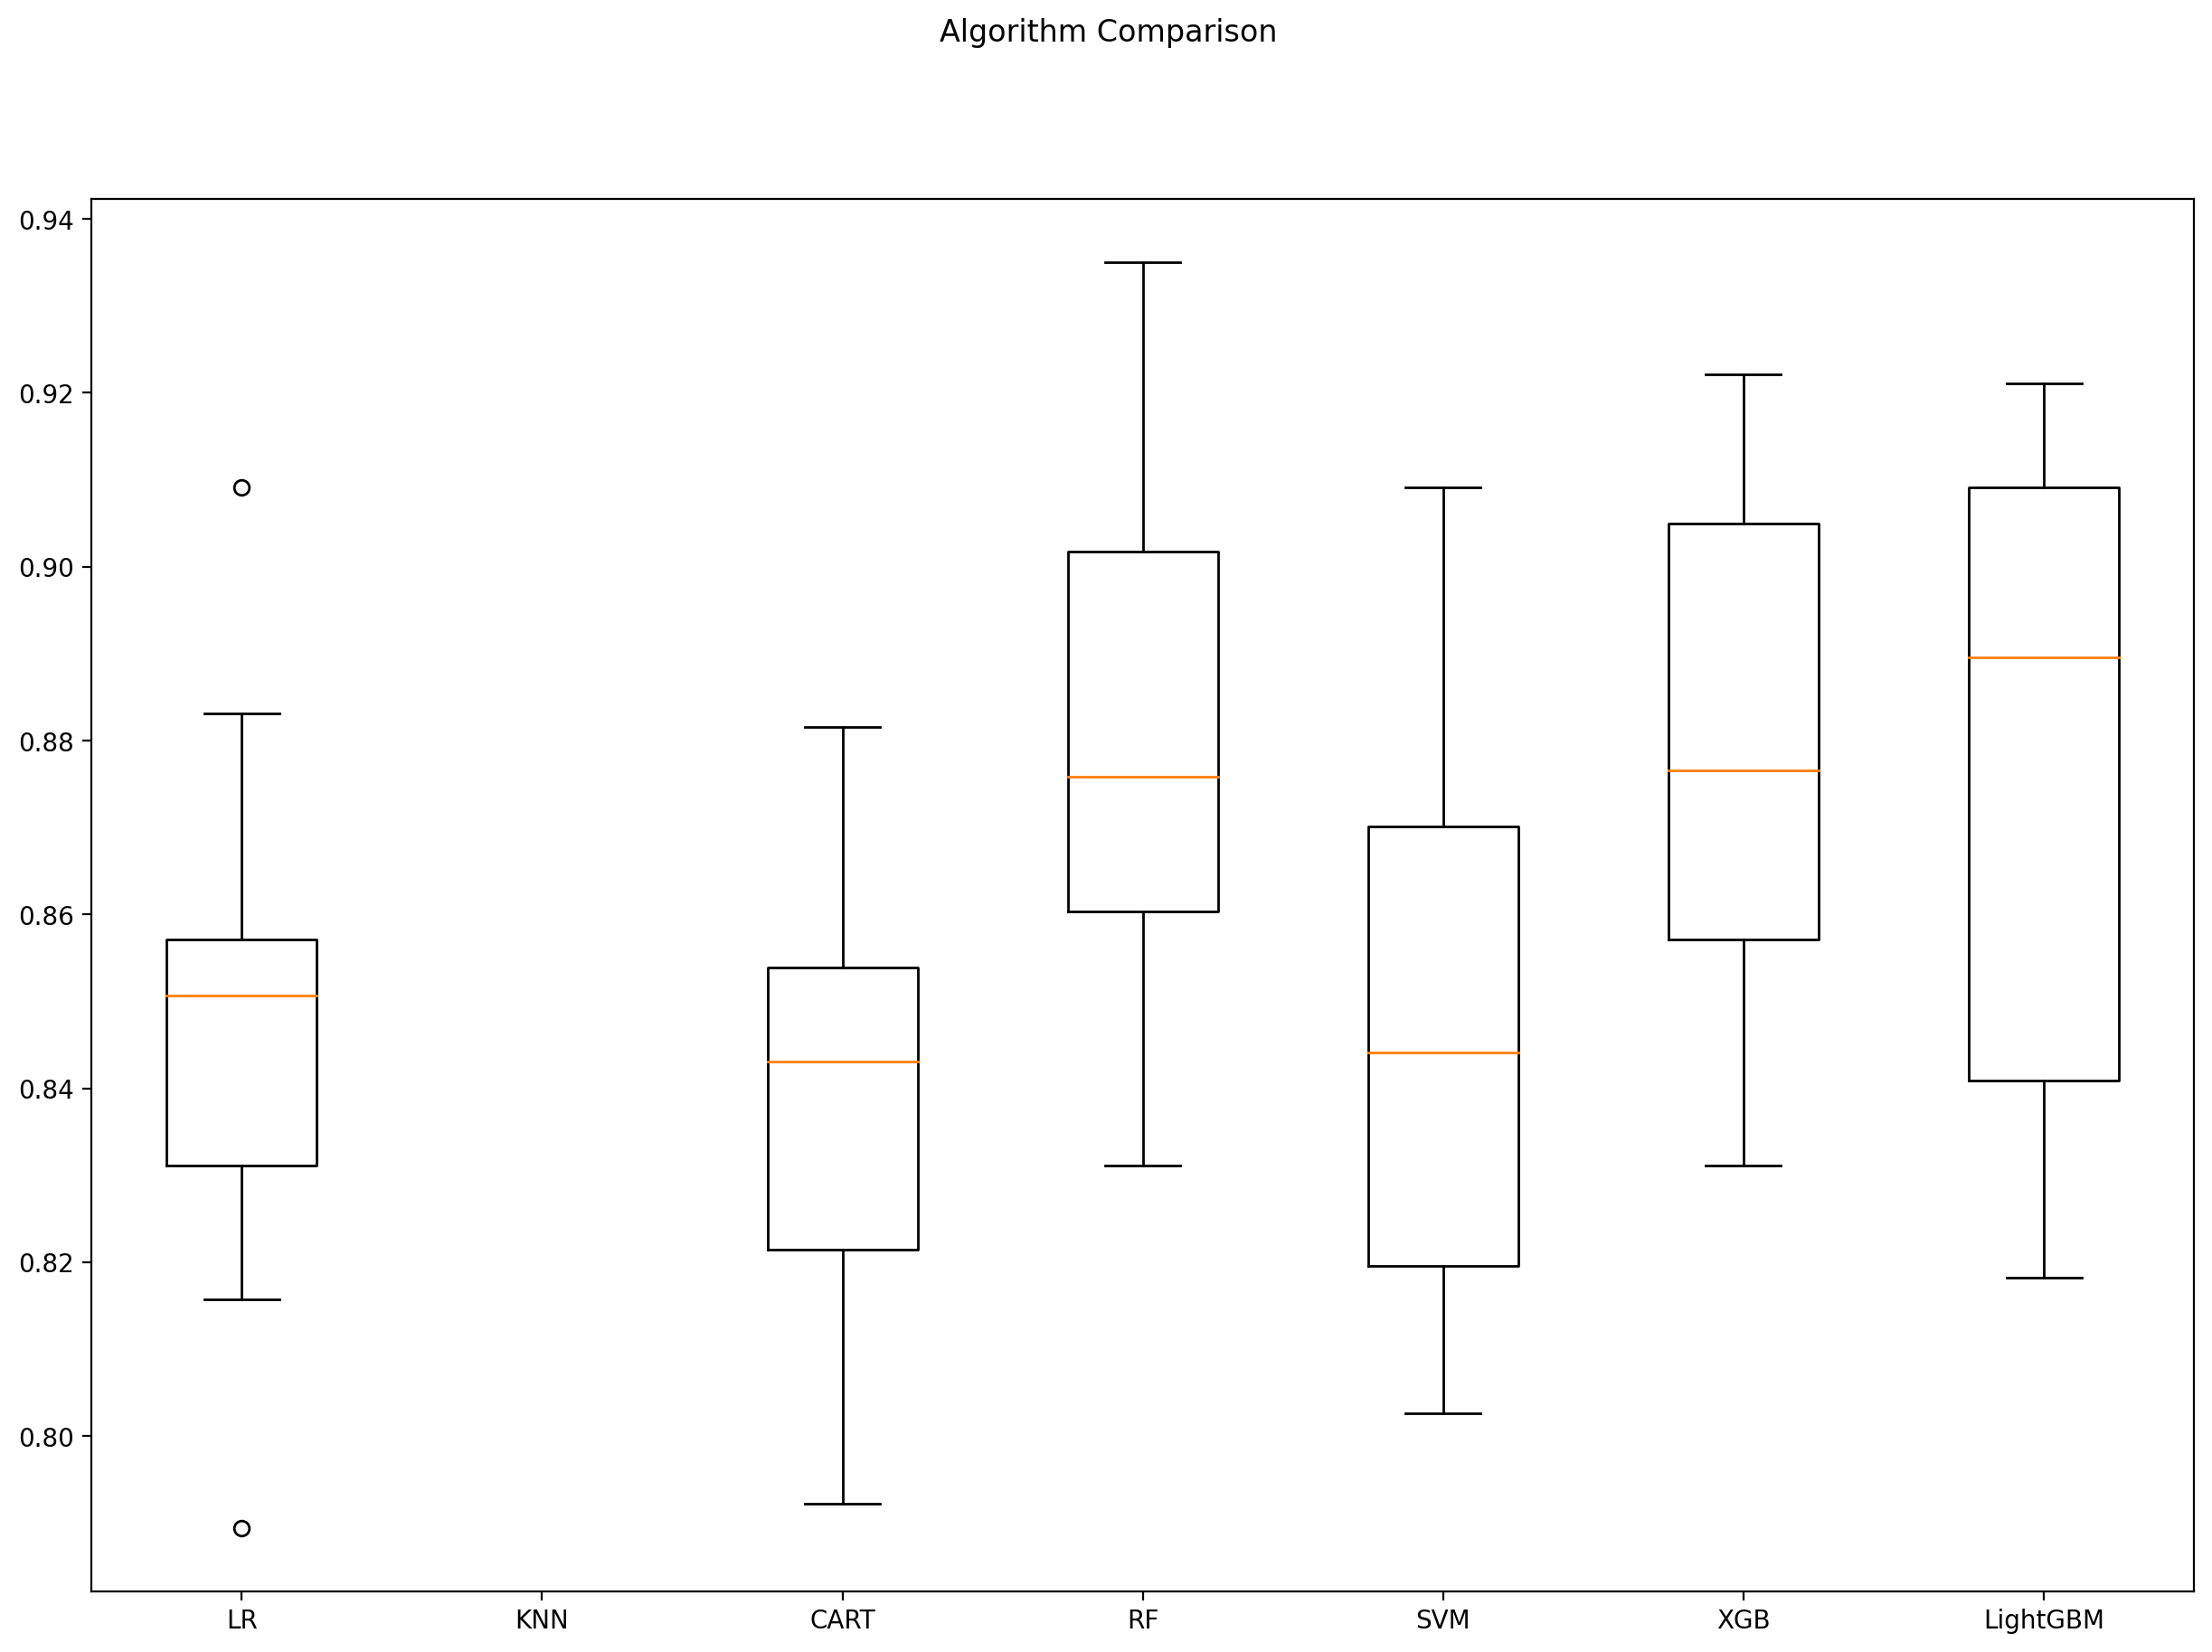

In [56]:
models = []
models.append(('LR', LogisticRegression(random_state = 12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 12345)))
models.append(('RF', RandomForestClassifier(random_state = 12345)))
models.append(('SVM', SVC(gamma='auto', random_state = 12345)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345)))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    
        kfold = KFold(n_splits = 10)
        
        cv_results = cross_val_score(model, X, y, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()



## 9. Model Optimizasyonu (Model Tunning)

### 9.1. Random Forests Tuning

In [57]:
rf_params = {"n_estimators" :[100,200,500,1000], 
             "max_features": [3,5,7], 
             "min_samples_split": [2,5,10,30],
            "max_depth": [3,5,8,None]}



In [58]:
rf_model = RandomForestClassifier(random_state = 12345)

In [59]:
gs_cv = GridSearchCV(rf_model, 
                    rf_params,
                    cv = 10,
                    n_jobs = -1,
                    verbose = 2).fit(X, y)


Fitting 10 folds for each of 192 candidates, totalling 1920 fits


In [60]:
gs_cv.best_params_

{'max_depth': None,
 'max_features': 7,
 'min_samples_split': 5,
 'n_estimators': 500}

### 9.1.1. RF Final Model

In [61]:
rf_tuned = RandomForestClassifier(**gs_cv.best_params_)

In [62]:
rf_tuned = rf_tuned.fit(X,y)

In [63]:
cross_val_score(rf_tuned, X, y, cv = 10).mean()

0.8841934381408064

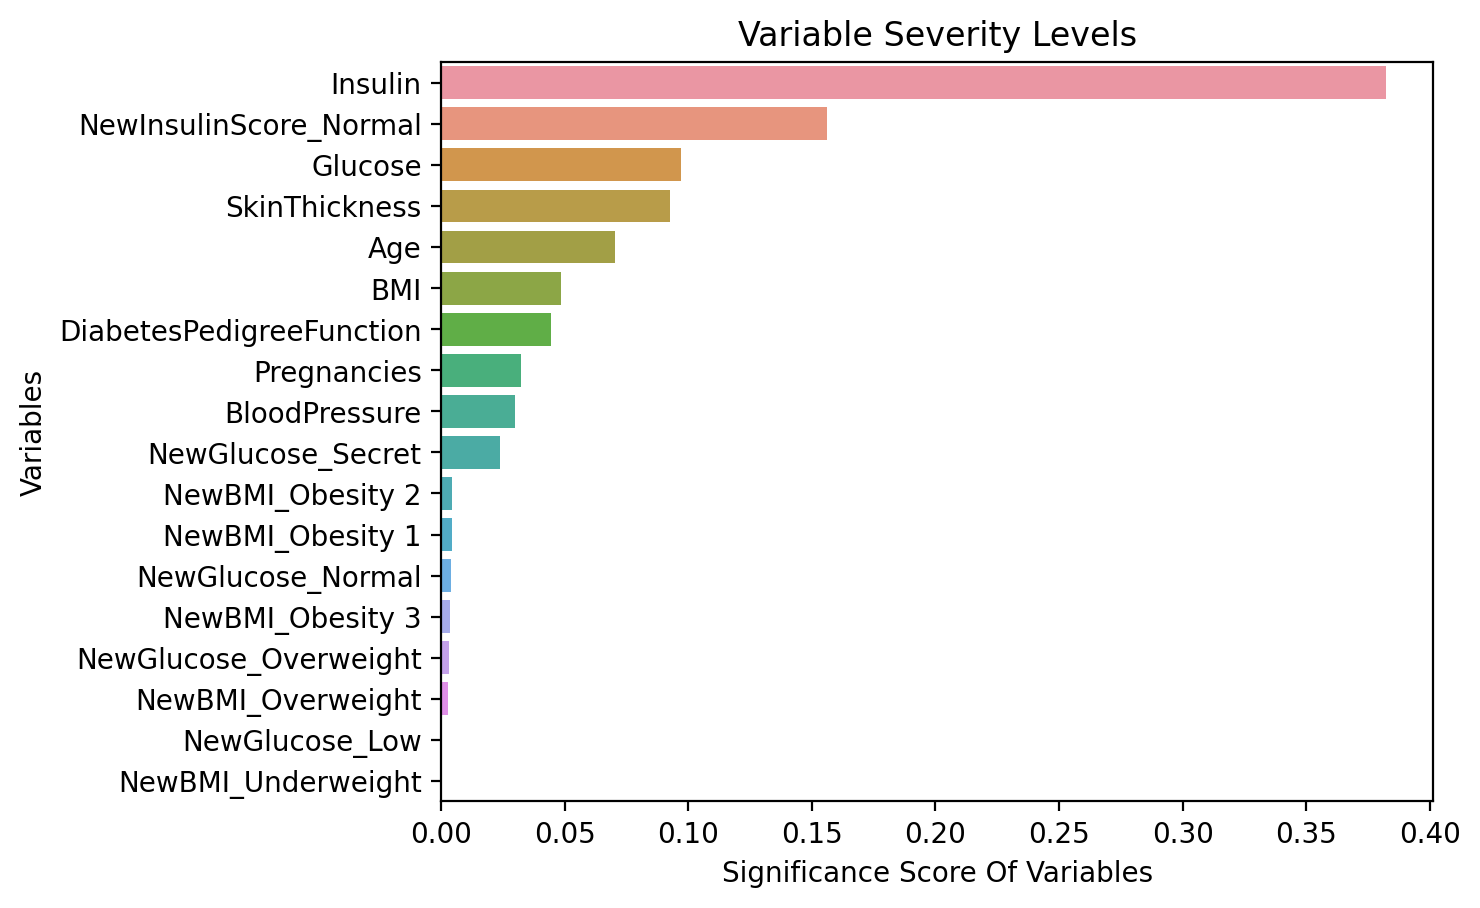

In [64]:
feature_imp = pd.Series(rf_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()

### 9.2. LightGBM Model Tuning

In [65]:
lgbm = LGBMClassifier(random_state = 12345)

In [66]:
lgbm_params = {"learning_rate": [0.01, 0.03, 0.05, 0.1, 0.5],
              "n_estimators": [500, 1000, 1500],
              "max_depth":[3,5,8]}


In [67]:
gs_cv = GridSearchCV(lgbm, 
                     lgbm_params, 
                     cv = 10, 
                     n_jobs = -1, 
                     verbose = 2).fit(X, y)

Fitting 10 folds for each of 45 candidates, totalling 450 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 268, number of negative: 500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000348 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 774
[LightGBM] [Info] Number of data points in the train set: 768, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348958 -> initscore=-0.623621
[LightGBM] [Info] Start training from score -0.623621
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [68]:
gs_cv.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000}

### 9.2.1 LightGBM Final Model

In [69]:
lgbm_tuned = LGBMClassifier(**gs_cv.best_params_).fit(X,y)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 268, number of negative: 500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000247 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 774
[LightGBM] [Info] Number of data points in the train set: 768, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348958 -> initscore=-0.623621
[LightGBM] [Info] Start training from score -0.623621
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [70]:
cross_val_score(lgbm_tuned, X, y, cv = 10).mean()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 241, number of negative: 450
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000092 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 726
[LightGBM] [Info] Number of data points in the train set: 691, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348770 -> initscore=-0.624451
[LightGBM] [Info] Start training from score -0.624451
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

0.8959159261790841

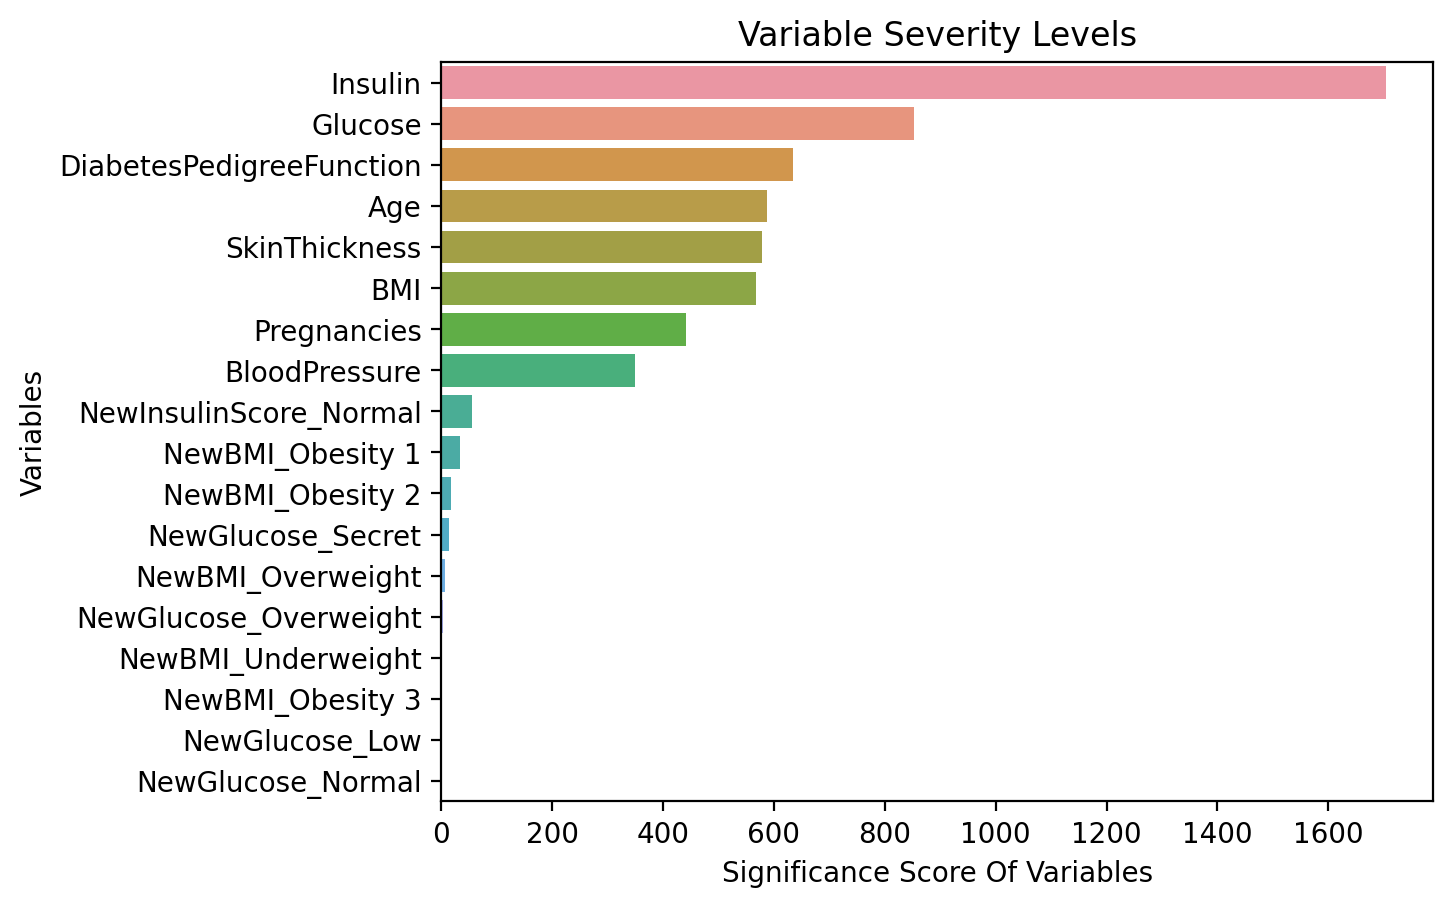

In [71]:
feature_imp = pd.Series(lgbm_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()

### 9.3. XGBoost Model Tuning

In [72]:
xgb = GradientBoostingClassifier(random_state = 12345)

In [73]:
xgb_params = {
    "learning_rate": [0.01, 0.1, 0.2, 1],
    "min_samples_split": np.linspace(0.1, 0.5, 10),
    "max_depth":[3,5,8],
    "subsample":[0.5, 0.9, 1.0],
    "n_estimators": [100,1000]}

In [74]:
xgb_cv_model  = GridSearchCV(xgb,xgb_params, cv = 10, n_jobs = -1, verbose = 2).fit(X, y)

Fitting 10 folds for each of 720 candidates, totalling 7200 fits


In [75]:
xgb_cv_model.best_params_

{'learning_rate': 0.01,
 'max_depth': 8,
 'min_samples_split': 0.1,
 'n_estimators': 1000,
 'subsample': 1.0}

### 9.3.1. XGBoost Final Model

In [76]:
xgb_tuned = GradientBoostingClassifier(**xgb_cv_model.best_params_).fit(X,y)

In [77]:
cross_val_score(xgb_tuned, X, y, cv = 10).mean()

0.8971633629528366

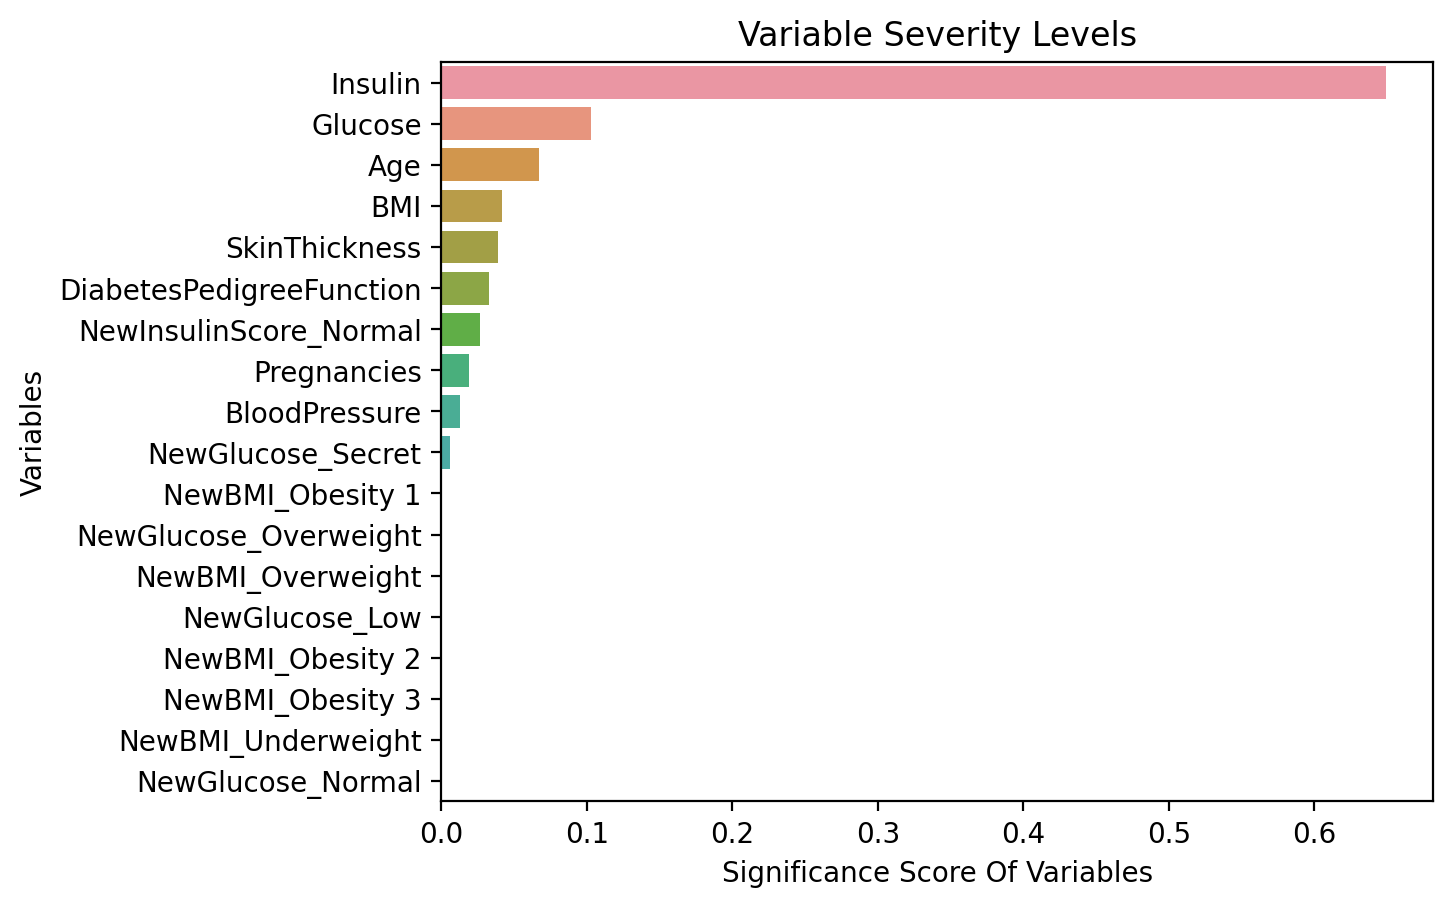

In [78]:
feature_imp = pd.Series(xgb_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()

## 10. Comparison of Final Models

In [79]:
models = []

models.append(('RF', RandomForestClassifier(random_state = 12345, max_depth = 8, max_features = 7, min_samples_split = 2, n_estimators = 500)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345, learning_rate = 0.1, max_depth = 5, min_samples_split = 0.1, n_estimators = 100, subsample = 1.0)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345, learning_rate = 0.01,  max_depth = 3, n_estimators = 1000)))

# evaluate each model in turn
results = []
names = []

RF: 0.886791 (0.028298)
XGB: 0.886757 (0.021597)
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 241, number of negative: 450
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000095 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 726
[LightGBM] [Info] Number of data points in the train set: 691, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348770 -> initscore=-0.624451
[LightGBM] [Info] Start training from score -0.624451
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

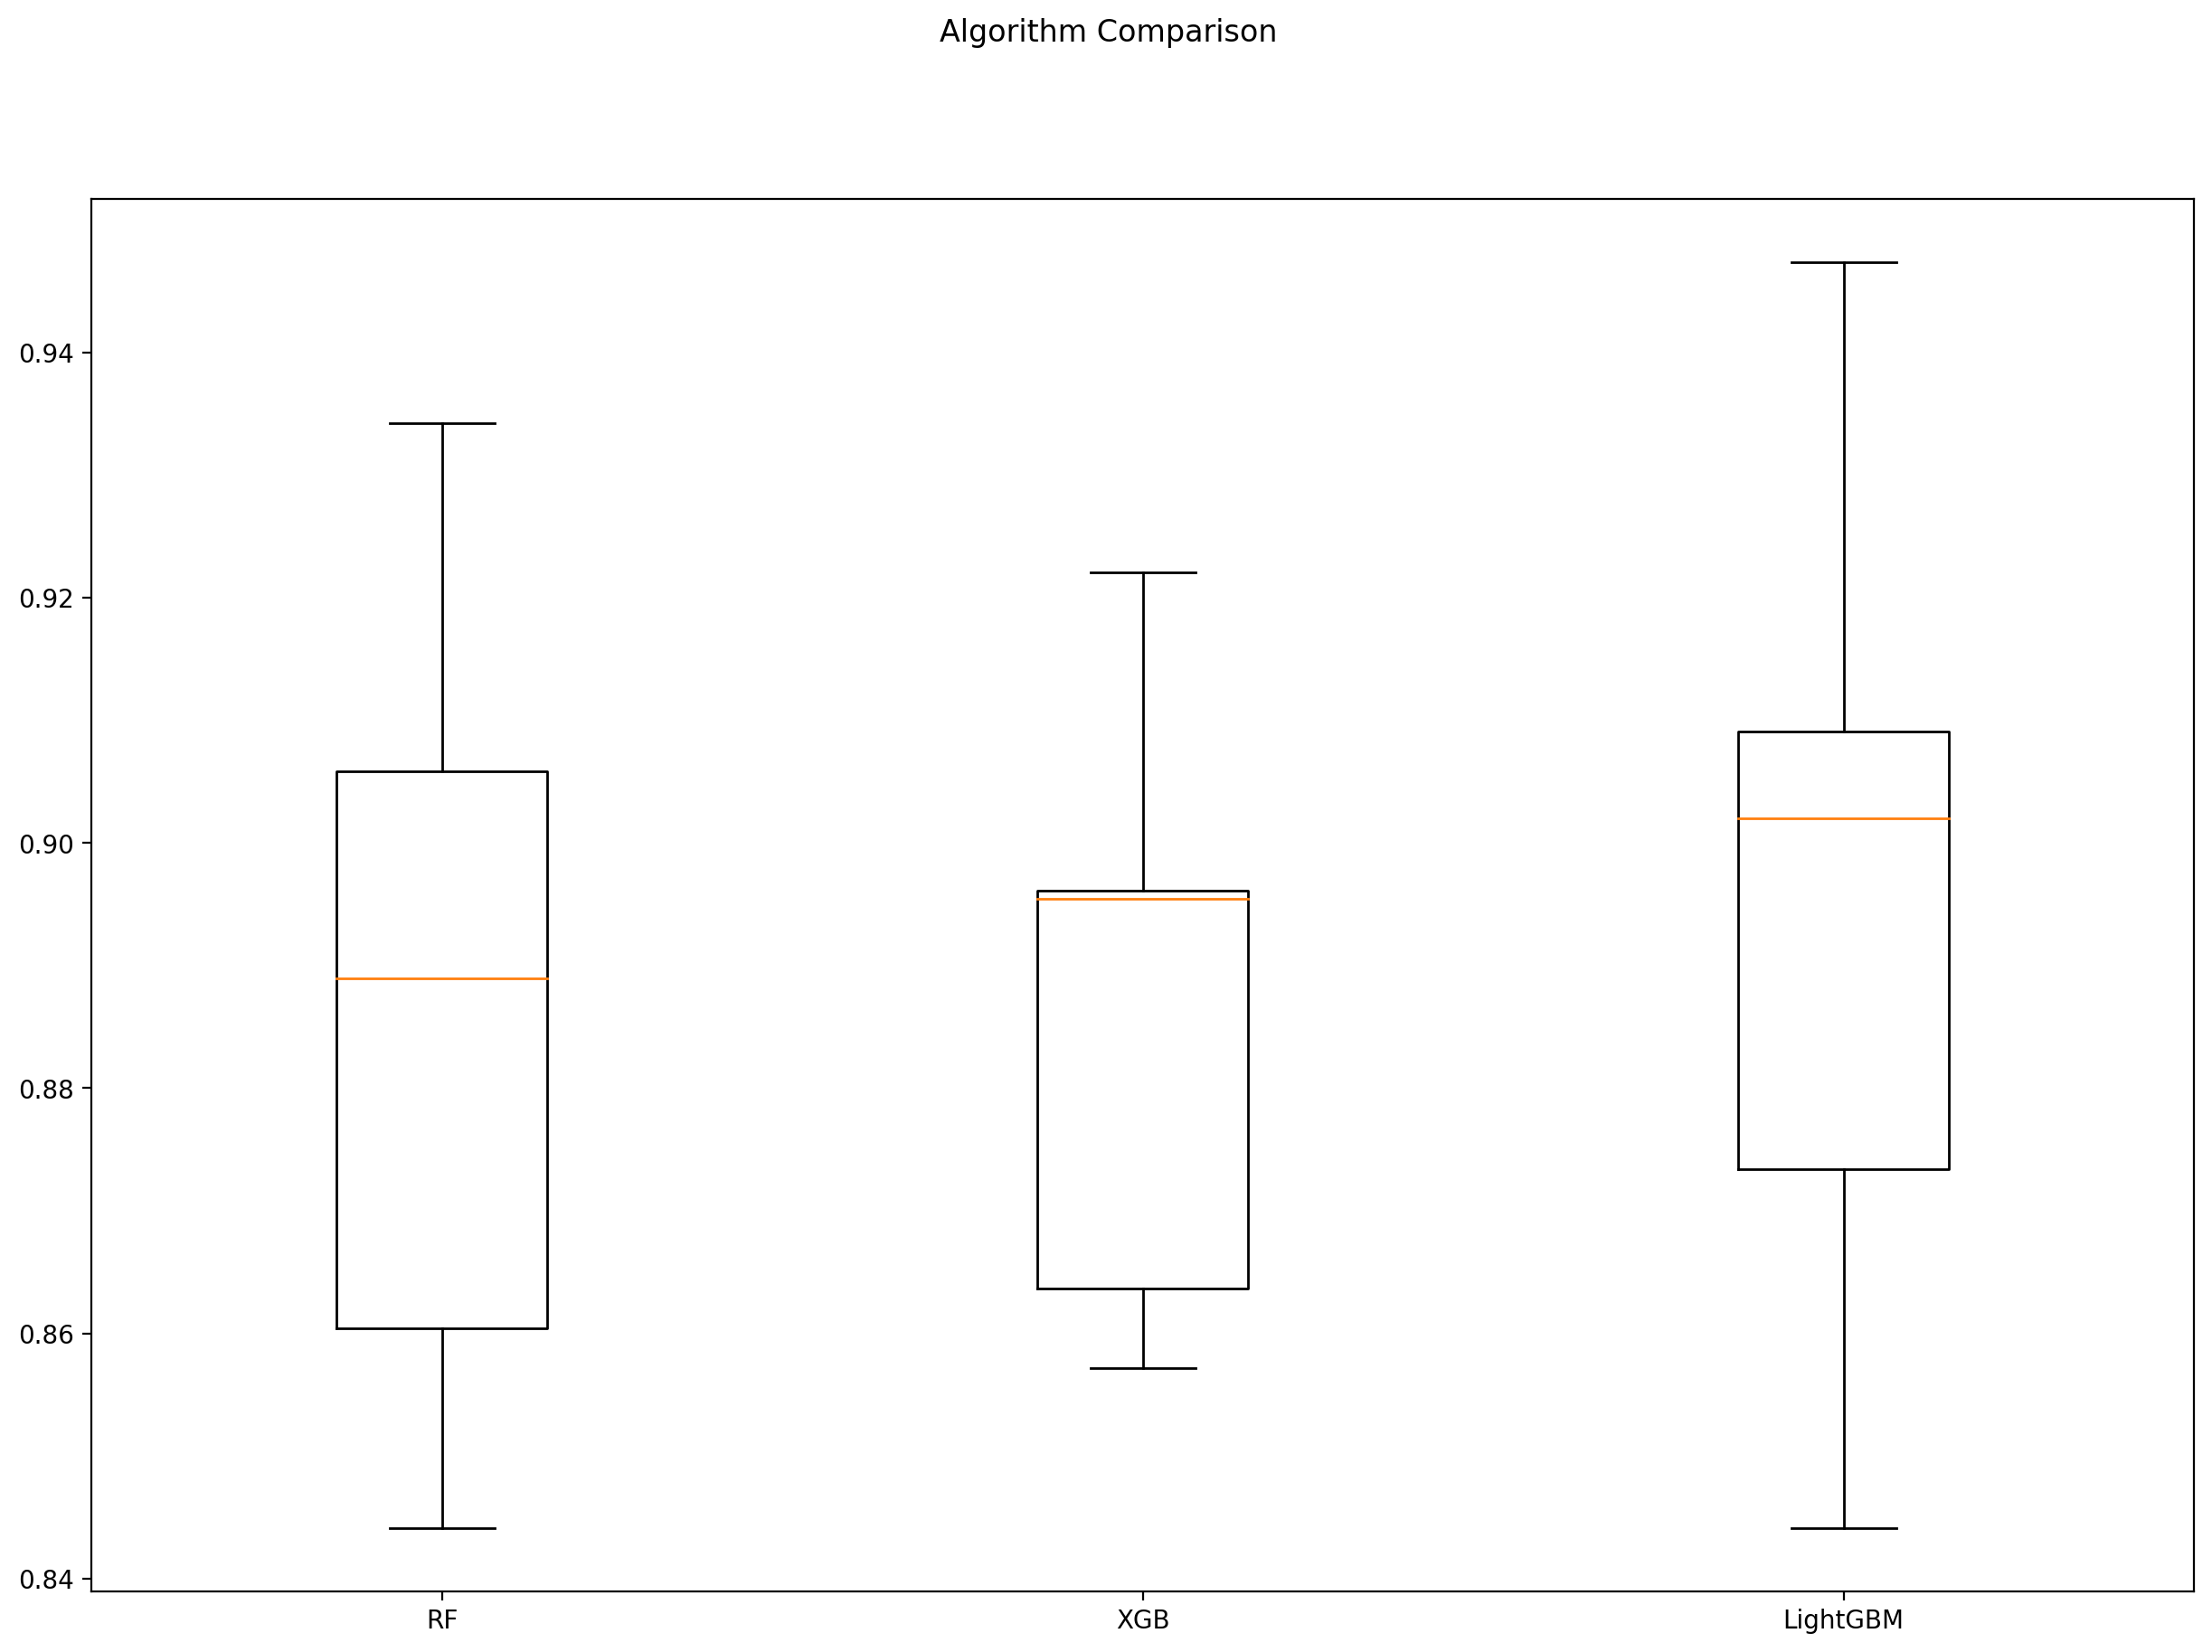

In [81]:
for name, model in models:
    
        kfold = KFold(n_splits = 10)
        cv_results = cross_val_score(model, X, y, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()